<a href="https://colab.research.google.com/github/victorious07/Regression_Capstone_Project/blob/main/Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


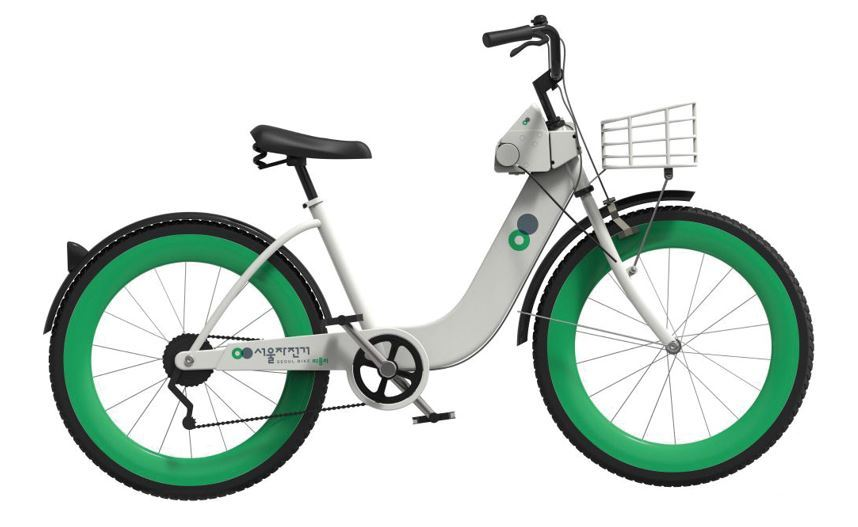


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
sns.set_style('darkgrid')

## **Introduction to data**

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
file_path ='/content/drive/MyDrive/Regression_Capstone_Project/'
seoul_bike_df = pd.read_csv(file_path + 'SeoulBikeData.csv',encoding='cp1252')

In [ ]:
seoul_bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
seoul_bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
seoul_bike_df.rename({"Temperature(°C)": "Temperature",  
                      "Functioning Day":"Functioning_Day",
           "Humidity(%)": "Humidity",  
           "Wind speed (m/s)": "Wind_speed",
           "Visibility (10m)": "Visibility",
           "Dew point temperature(°C)": "Dew_point_temperature",
           "Solar Radiation (MJ/m2)": "Solar_Radiation",
           "Snowfall (cm)": "Snowfall",
           "Rainfall(mm)": "Rainfall",
           "Rented Bike Count": "Rented_Bike_Count"},  
          axis = "columns", inplace = True) 


**Shape**

In [ ]:
seoul_bike_df.shape

(8760, 14)

**Info**

In [ ]:
seoul_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
#checking Duplicate values
seoul_bike_df.duplicated().sum()

0

**Missingno library offers a very nice way to visualize the distribution of NaN values.**

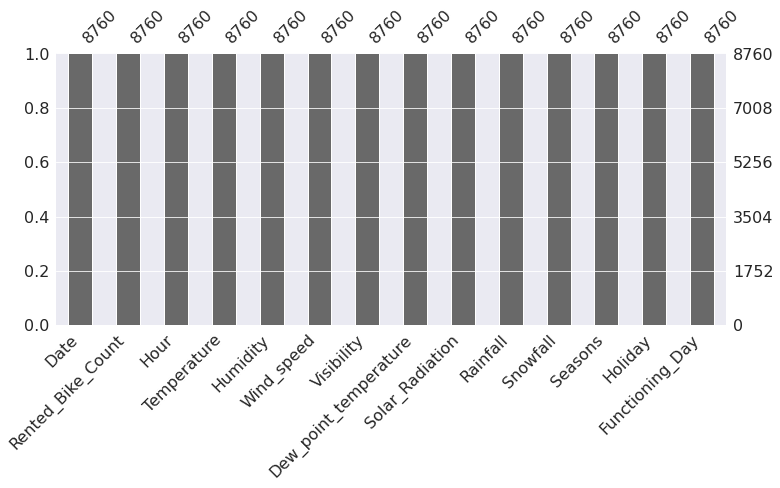

In [ ]:
import missingno as msno
msno.bar(seoul_bike_df,figsize=(12,5))
#msno.matrix(seoul_bike_df,figsize=(12,5))

In [ ]:
#counting the null value across the columns
seoul_bike_df.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [ ]:
seoul_bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
#unique seasons
seoul_bike_df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
#unique Holiday
seoul_bike_df.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
#unique hour
seoul_bike_df.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
# plt.title("Hours")
# seoul_bike_df['Hour'].value_counts().plot(kind='pie',figsize=(8,5))
# plt.show()

In [ ]:
seoul_bike_df.Functioning_Day.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
#seoul_bike_df.loc[seoul_bike_df['Functioning_Day'] == 'No',['Functioning_Day','Rented_Bike_Count']]
seoul_bike_df.groupby('Functioning_Day')['Rented_Bike_Count'].sum().reset_index()

,Functioning_Day,Rented_Bike_Count
0,No,0
1,Yes,6172314


In [ ]:
seoul_bike_df = seoul_bike_df[seoul_bike_df['Functioning_Day'] == 'Yes']
seoul_bike_df.drop('Functioning_Day', axis=1, inplace=True)

In [ ]:
seoul_bike_df.shape

(8465, 13)

## **Dependent variable**

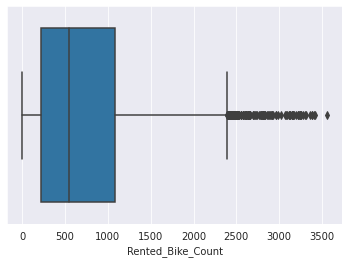

In [ ]:
sns.boxplot(seoul_bike_df['Rented_Bike_Count'])

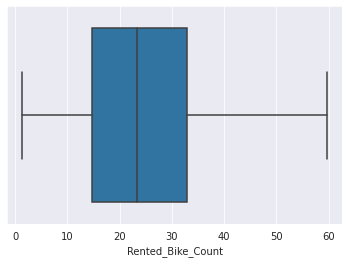

In [ ]:
sns.boxplot(np.sqrt(seoul_bike_df['Rented_Bike_Count']))

**Observations:**<br>
After applying Square root to the Rented Bike Count column, we found that there is no outliers present.


## **Catagorical Variables**

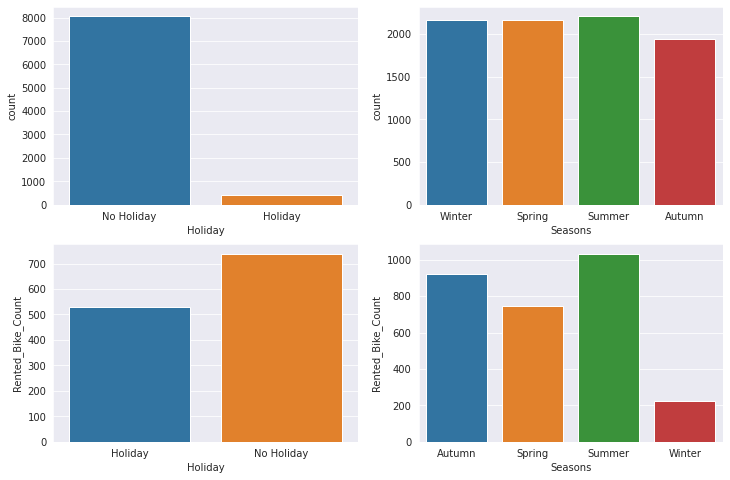

In [ ]:
fig,ax = plt.subplots(2,2,figsize=(12,8))
ax1 = plt.subplot(2,2,1)
sns.countplot(seoul_bike_df['Holiday'])
ax1 = plt.subplot(2,2,2)
sns.countplot(seoul_bike_df['Seasons'])

# Bike rented in Seasons and holidays
holiday_df = seoul_bike_df.groupby('Holiday')['Rented_Bike_Count'].mean().reset_index()
seasons_df = seoul_bike_df.groupby('Seasons')['Rented_Bike_Count'].mean().reset_index()

ax1 = plt.subplot(2,2,3)
sns.barplot(x = holiday_df['Holiday'],y = holiday_df['Rented_Bike_Count'])

ax1 = plt.subplot(2,2,4)
sns.barplot(x = seasons_df['Seasons'],y = seasons_df['Rented_Bike_Count'])

**Observations:**<br>
From the above data, we observe that large number of bikes are being rented when there is a working day/No Holiday and more often in summer season. Even in general also, bikes are being rented more in the working day itself regardless of the seasons.

**Label Encoding**

In [ ]:
categorical_variables = ['Holiday','Seasons']

In [ ]:
encode=LabelEncoder()
seoul_bike_df[categorical_variables]=seoul_bike_df[categorical_variables].apply(lambda X: encode.fit_transform(X))

In [ ]:
seoul_bike_df.head(2)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1


## **Numerical Variables**

In [ ]:
seoul_bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday'],
      dtype='object')

In [ ]:
numerical_features = ['Hour','Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall']

In [ ]:
# List of colors in the color palettes
rgb_values = sns.color_palette('Set1',9)

color_map = dict(zip(numerical_features,rgb_values))

In [ ]:
rgb_values

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6)]

In [ ]:
seoul_bike_df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

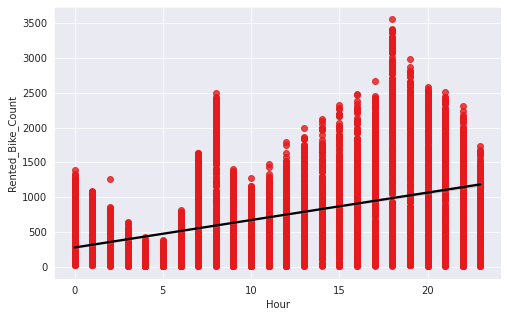

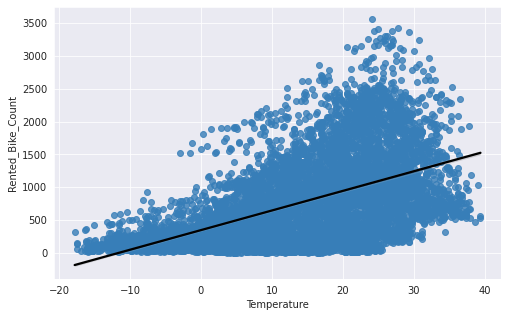

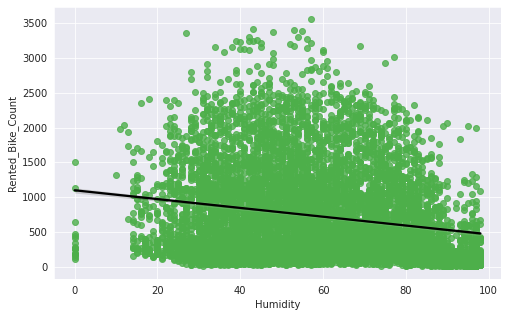

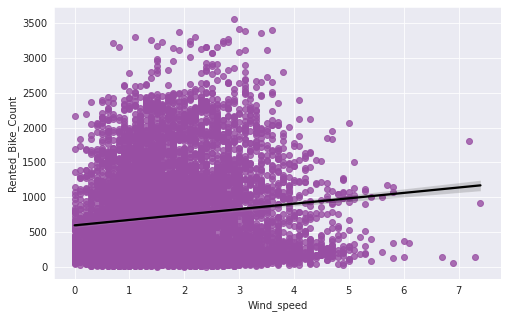

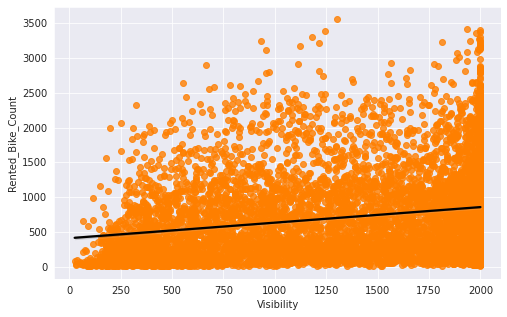

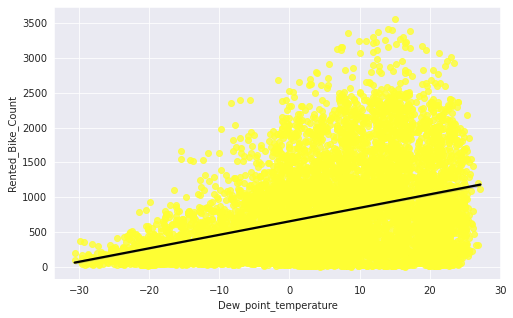

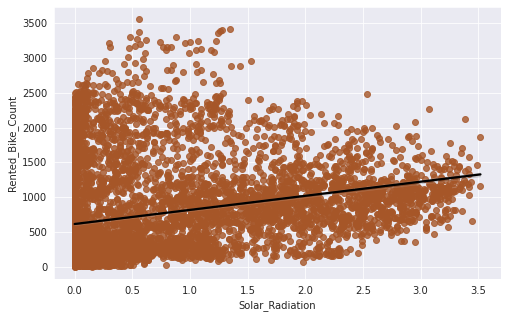

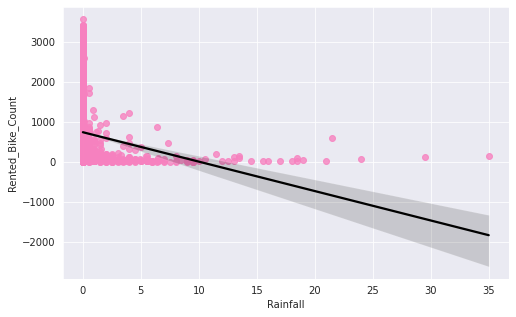

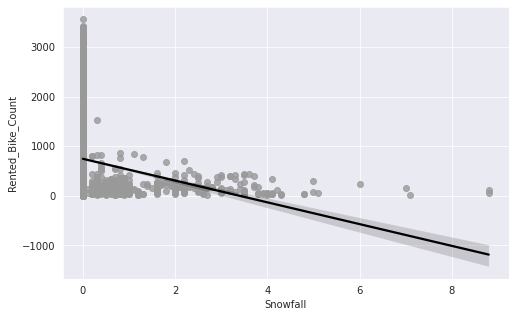

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

for key,value in zip(numerical_features,color_map):
  plt.figure()
  sns.regplot(x=seoul_bike_df[key],y=seoul_bike_df['Rented_Bike_Count'],scatter_kws={"color": color_map[value]},line_kws={"color": "black"})


**Observations:**
* <font color = 'blue'>**Hour :**</font> There must be high demand during the office timings around 8 A.M. and 8 P.M., also for early morning and late evening we are having a relatively different trends.
* <font color = 'blue'>**Temp:** </font> As Temp increases the bike count also increases.
*  <font color = 'blue'>**Humidity :**</font> Humidity acts as a deterrent(a thing that discourages or is intended to discourage someone from doing something) to a bike ride. The bike count decreases when the humidity increases.
* <font color = 'blue'>**Wind Speed :**</font> Due to Wind speed , there is certain increase in the bike count but the change is very small.
* <font color = 'blue'>**Visibility :**</font> If there is low visibility, people won't prefer to ride the bike. So,as the visibility increases , the number of bike count also increases.
* <font color = 'blue'>**Rainfall and Snowfall :**</font> If there is rainfall/Snowfall, people don't prefer to travel out. And, hence the bike count decreases.









## **Change in Bike Renting with Change in hours**

In [ ]:
seoul_bike_df['Date']=pd.to_datetime(seoul_bike_df['Date'])

In [ ]:
bike_renting_change = seoul_bike_df[['Date','Rented_Bike_Count']]

In [ ]:
bike_renting_change['year'] = bike_renting_change['Date'].dt.year
bike_renting_change['month'] = bike_renting_change['Date'].dt.month

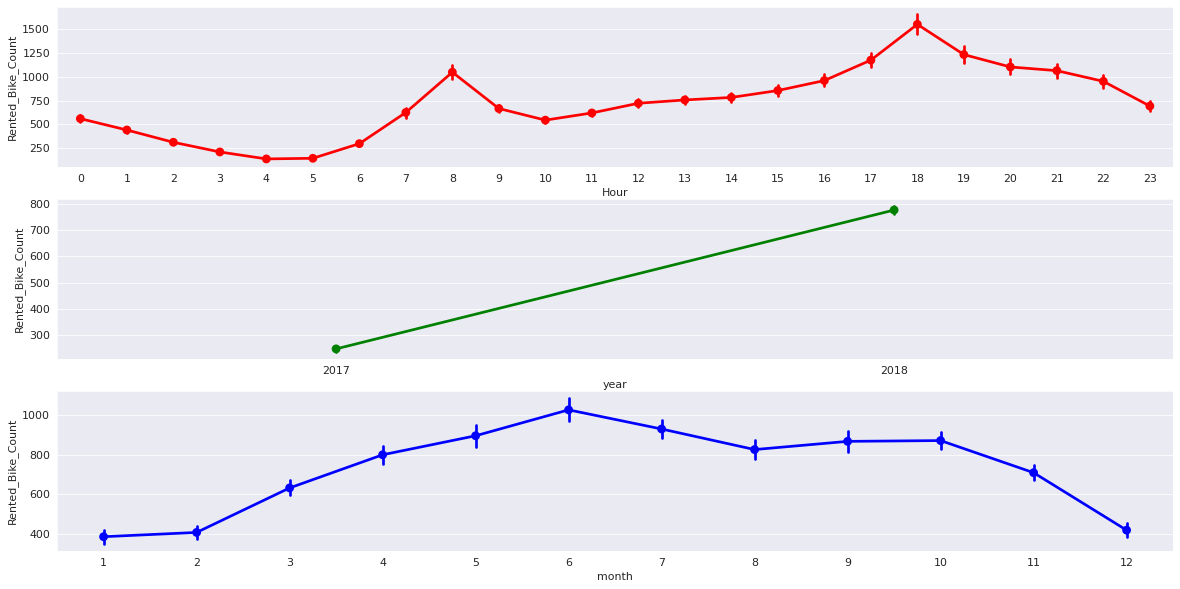

In [ ]:
plt.rc('font', size=11)

figure, axes = plt.subplots(nrows=3,figsize=(20,10))
sns.pointplot(data = seoul_bike_df, x='Hour', y='Rented_Bike_Count',color="r",ax=axes[0])


sns.pointplot(x=bike_renting_change['year'], y=bike_renting_change['Rented_Bike_Count'],color="g",ax=axes[1])

sns.pointplot(x=bike_renting_change['month'], y=bike_renting_change['Rented_Bike_Count'],color="b",ax=axes[2])

**Observations:**
* There must be high demand during the office timings around 8 A.M. and 6 P.M., also for early morning and late evening we are having a relatably different trends.
* Compare to 2017 there was a increase in count of bike rent in 2018.
* There must be high demand in the month **June** and low demand in **December**.

## **Correlation**

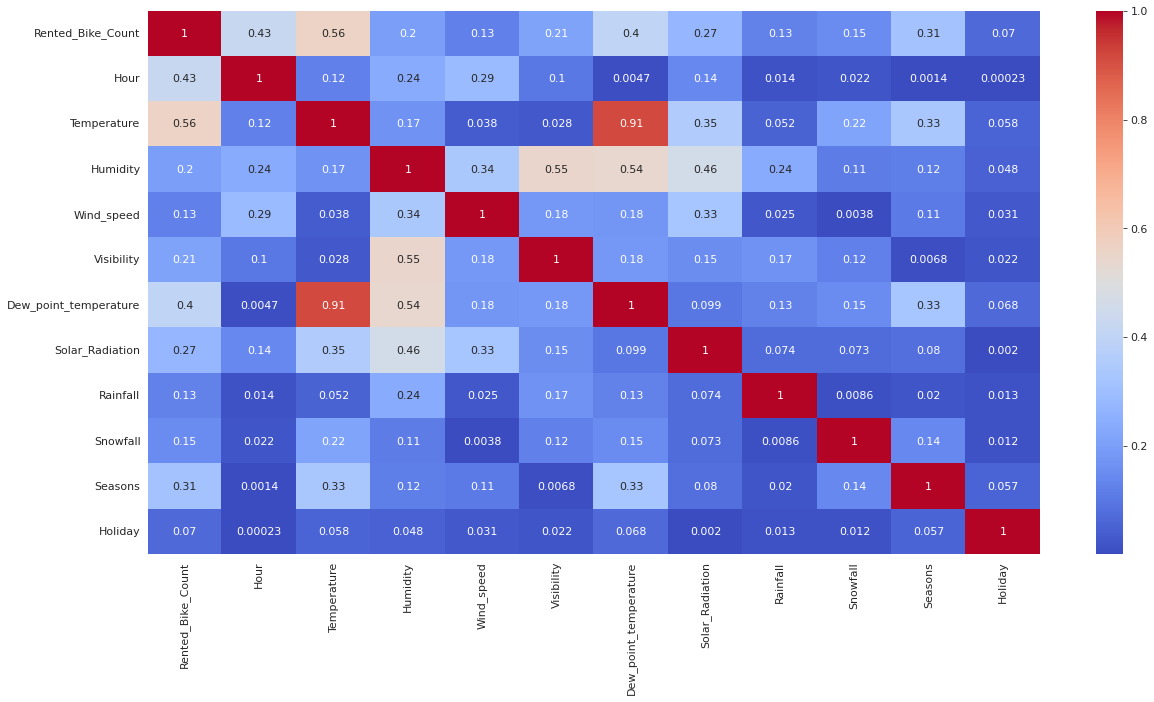

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(seoul_bike_df.corr().abs(),annot=True,cmap='coolwarm')

***Dew point is highly corelated with Temperature, dropping Dew point***

**Multicollinearity**


*   VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
                      

* VIF score of an independent variable represents how well the variable is explained by other independent variables.

* **VIF** = **$1/1-R^2$**




In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return vif


In [ ]:
calc_vif(seoul_bike_df.drop(columns= ['Date','Rented_Bike_Count']))

,variables,VIF
0,Hour,4.418146
1,Temperature,41.031845
2,Humidity,15.178020
3,Wind_speed,4.856375
4,Visibility,9.123093
5,Dew_point_temperature,23.327535
6,Solar_Radiation,2.864821
7,Rainfall,1.083518
8,Snowfall,1.129566
9,Seasons,3.316340


In [ ]:
calc_vif(seoul_bike_df.drop(columns= ['Date','Rented_Bike_Count','Dew_point_temperature']))

,variables,VIF
0,Hour,4.102488
1,Temperature,3.500001
2,Humidity,10.322545
3,Wind_speed,4.733598
4,Visibility,6.301679
5,Solar_Radiation,2.378604
6,Rainfall,1.082832
7,Snowfall,1.128496
8,Seasons,3.168925
9,Holiday,15.616871


## **Train Test Split**

In [ ]:
#independent variable
X = seoul_bike_df.drop(columns=['Date','Rented_Bike_Count','Dew_point_temperature'])

#dependent variable
Y = np.sqrt(seoul_bike_df['Rented_Bike_Count'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(6772, 10) (1693, 10)
(6772,) (1693,)


In [ ]:
#Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## **Evaluation Metrics**

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
def evaluation(Y,y):

  MAE = mean_absolute_error(Y,y)

  MSE = mean_squared_error(Y,y)

  RMSE = np.sqrt(MSE)

  r2 = r2_score(Y, y)
  
  Adjusted_R2 = 1 -(1 - r2_score((Y) , (y)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  
  return MAE, MSE, RMSE, r2,  Adjusted_R2

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
regressor.intercept_

24.360442986798848

In [ ]:
regressor.coef_

array([ 3.55620574,  6.86136065, -3.26818797,  0.06969275,  0.15460247,
       -0.86818882, -1.85608614,  0.11654824, -2.31460477,  0.61188721])

In [ ]:
regressor.score(X_train,Y_train)

0.6166007399042321

In [ ]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

**Training Set**

In [ ]:
evaluation_score = evaluation(Y_train,y_train_pred)

In [ ]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 5.633537720510057
MSE: 54.13776638400084
RMSE: 7.357837072401158
R2: 0.6166007399042321
Adjusted_R2 : 0.6143213150522954


In [ ]:
#storing data
dict_1 = {'Model':'Linear regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

training_df=pd.DataFrame(dict_1,index=[1])       

**Testing Set**

In [ ]:
evaluation_score = evaluation(Y_test,y_test_pred)

In [ ]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 5.6651279999844935
MSE: 55.28478755645324
RMSE: 7.43537406970579
R2: 0.599197751072102
Adjusted_R2 : 0.59681486017479


In [ ]:
#storing data
dict_2 = {'Model':'Linear regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

testing_df=pd.DataFrame(dict_2,index=[1])       

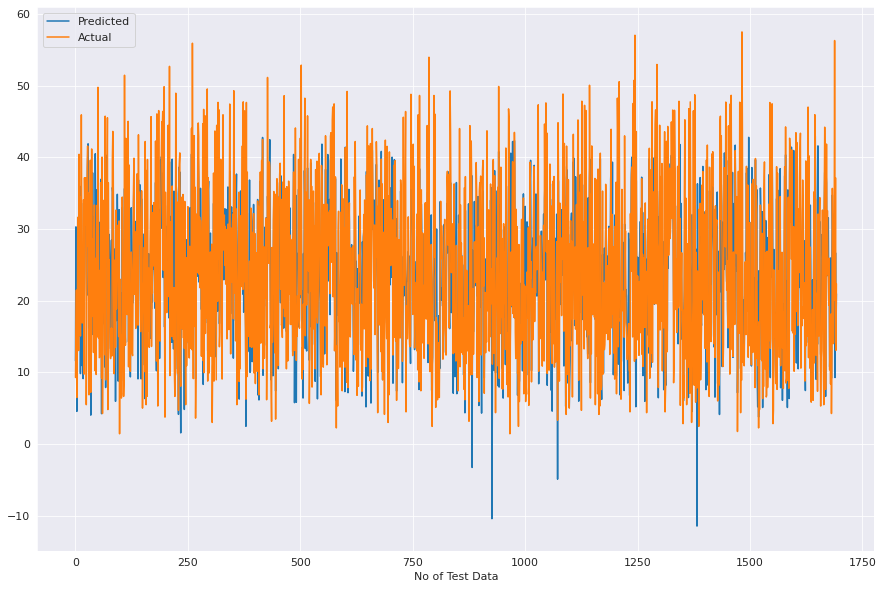

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(y_test_pred)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## **Lasso Regression**

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.01)

In [ ]:
lasso.score(X_train,Y_train)

0.6165891753419741

In [ ]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

**Training Set**

In [ ]:
evaluation_score = evaluation(Y_train,y_train_pred)

In [ ]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 5.633499376123986
MSE: 54.13939935420976
RMSE: 7.357948039651392
R2: 0.6165891753419741
Adjusted_R2 : 0.6143096817352083


In [ ]:
#storing data
dict_1 = {'Model':'Lasso regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

training_df=training_df.append(dict_1, ignore_index=True)       

**Testing Set**

In [ ]:
evaluation_score = evaluation(Y_test,y_test_pred)

In [ ]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 5.665693877846221
MSE: 55.277644532405304
RMSE: 7.434893713591695
R2: 0.5992495363864552
Adjusted_R2 : 0.5968669533685387


In [ ]:
dict_2 = {'Model':'Lasso regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

testing_df=testing_df.append(dict_2, ignore_index=True)       

## **Ridge Rigression**

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [ ]:
ridge.score(X_train,Y_train)

0.6166007396579998

In [ ]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

**Training Set**

In [ ]:
evaluation_score = evaluation(Y_train,y_train_pred)

In [ ]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 5.633536717602092
MSE: 54.13776641876999
RMSE: 7.357837074763887
R2: 0.6166007396579998
Adjusted_R2 : 0.6143213148045991


In [ ]:
#storing data
dict_1 = {'Model':'Ridge regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

training_df=training_df.append(dict_1, ignore_index=True)       

**Testing Set**

In [ ]:
evaluation_score = evaluation(Y_test,y_test_pred)

In [ ]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 5.665126777595061
MSE: 55.28469626599739
RMSE: 7.435367930775006
R2: 0.5991984129073307
Adjusted_R2 : 0.5968155259448297


In [ ]:
dict_2 = {'Model':'Ridge regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

testing_df=testing_df.append(dict_2, ignore_index=True)       

## **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9, max_leaf_nodes=100)
tree.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

**Training Set**

In [ ]:
evaluation_score = evaluation(Y_train,y_train_pred)

In [ ]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 3.2036128936505937
MSE: 19.61591394652303
RMSE: 4.428985656617441
R2: 0.861081692217325
Adjusted_R2 : 0.8602557807560725


In [ ]:
#storing data
dict_1 = {'Model':'Decision Tree regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

training_df=training_df.append(dict_1, ignore_index=True)       

**Testing Set**

In [ ]:
evaluation_score = evaluation(Y_test,y_test_pred)

In [ ]:
print(f'MAE: {evaluation_score[0]}\nMSE: {evaluation_score[1]}\nRMSE: {evaluation_score[2]}\nR2: {evaluation_score[3]}\nAdjusted_R2 : {evaluation_score[4]}')

MAE: 3.6821480977070857
MSE: 27.59080166991728
RMSE: 5.2526947055694455
R2: 0.7999729066927449
Adjusted_R2 : 0.7987836849727256


In [ ]:
dict_2 = {'Model':'Decision Tree regression ',
       'MAE':round((evaluation_score[0]),3),
       'MSE':round((evaluation_score[1]),3),
       'RMSE':round((evaluation_score[2]),3),
       'R2_score':round((evaluation_score[3]),3),
       'Adjusted R2':round((evaluation_score[4]),2)}

testing_df=testing_df.append(dict_2, ignore_index=True)       

Text(0, 0.5, 'Predicted')

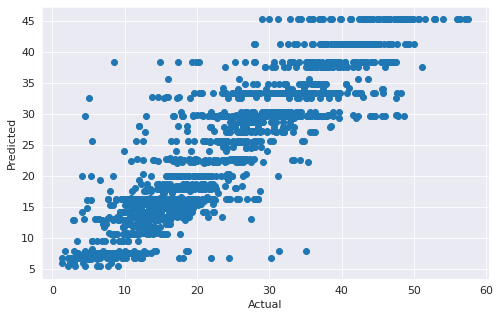

In [ ]:
plt.scatter(Y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

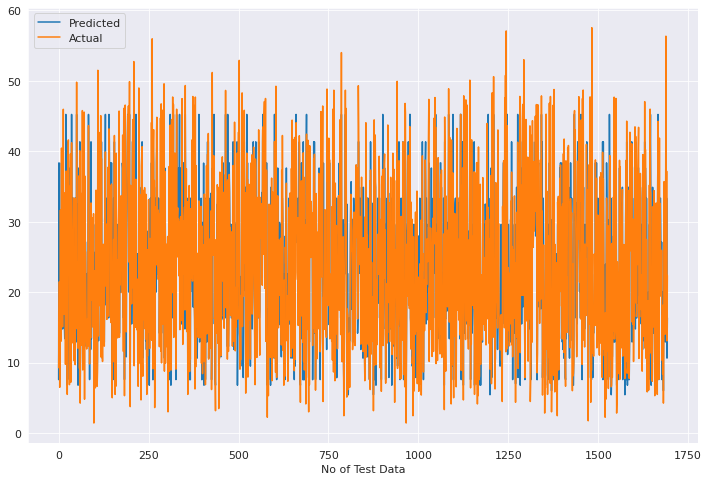

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_test_pred)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [ ]:
tree.feature_importances_

array([0.34224901, 0.40187192, 0.13769687, 0.00151412, 0.00174864,
       0.01811954, 0.03735304, 0.00329586, 0.05378058, 0.00237042])

In [ ]:
features = X.columns
importances = tree.feature_importances_
indices = np.argsort(importances)

In [ ]:
indices

array([3, 4, 9, 7, 5, 6, 8, 2, 0, 1])

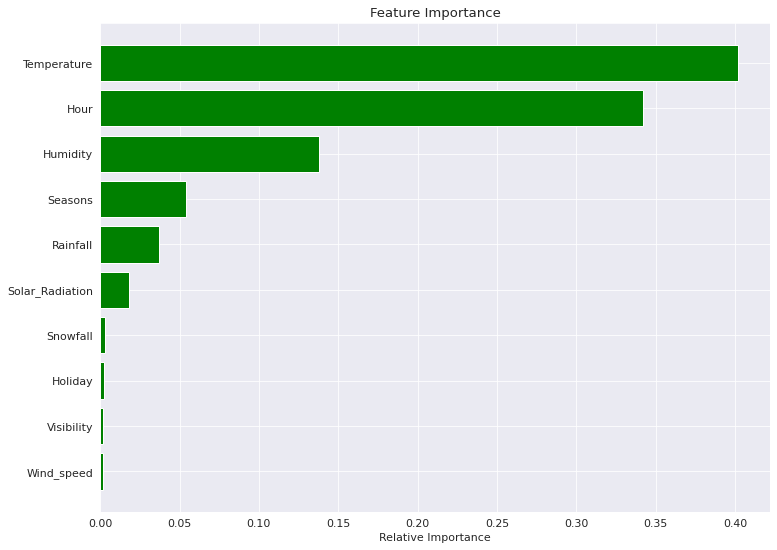

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()